### IMPORT LIBRARY

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator

### IMPORT PREPROCESSED DATASET

In [18]:
datafix = pd.read_excel('data_after_preprocessing.xlsx')
datafix

,Jenis Kelamin,Kategori Umur,Status Pulang Peserta,Segmen Peserta FKTP,Kelas Rawat,Segmen ICD 10
0,2,1,1,3,3,18
1,2,1,1,3,3,12
2,1,3,1,5,2,18
3,1,3,1,5,2,12
4,1,3,1,5,2,7
...,...,...,...,...,...,...
16170,2,1,1,4,3,1
16171,2,4,1,3,3,1
16172,2,4,2,3,3,4
16173,1,1,2,3,3,1


### CHECK THE OPTIMAL K VALUE WITH ELBOW METHOD

In [19]:
cost = []
silhouette_avg = {}
silhouette = []
db_index = {}
db = []
K = range(2,11)
for num_clusters in list(K):
    # Clustering
    # init: huang, cao
    kmode = KModes(n_clusters=num_clusters, init = "cao", verbose=1)
    
    # Class of Clustering
    classes = kmode.fit_predict(datafix)
    labels = kmode.labels_
    cost.append(kmode.cost_)
    silhouette_avg[num_clusters] = (silhouette_score(datafix, classes, metric='hamming'))
    silhouette.append(silhouette_score(datafix, classes, metric='hamming'))
    
    cluster = pd.DataFrame(classes)
    centroid = pd.DataFrame(kmode.cluster_centroids_)
    
    # reshaped_labels = labels.reshape(-1, 1)
    reshaped_labels = labels.ravel()
    db_index[num_clusters] = davies_bouldin_score(datafix, reshaped_labels)
    db.append(davies_bouldin_score(datafix, reshaped_labels))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 45576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 45576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 45576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 45576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 45576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 45576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 45576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

Optimal k value:  5


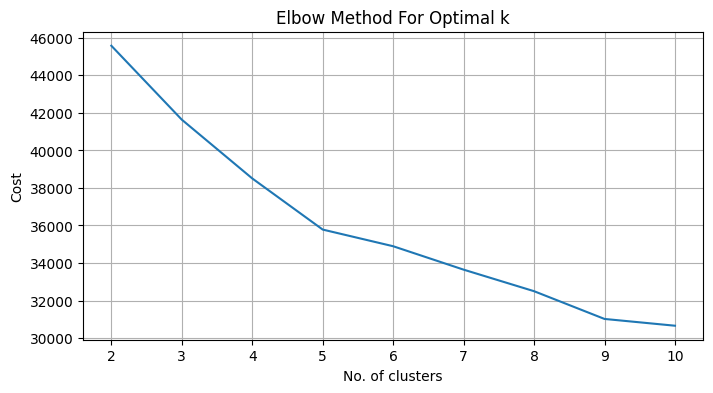

In [20]:
K = range(2,11)
# concave, convex
kn = KneeLocator(K, cost, curve='convex', direction='decreasing')
print('Optimal k value: ',kn.knee)

# Visualize the Elbow method
plt.figure(figsize=(8,4))
plt.plot(K, cost)
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.show()

### CLUSTER EVALUATION

In [21]:
# Silhouette Index
K = range(2,11)
for i in list(K):
    print(f'The Silhouette Score for {i} clusters is {silhouette_avg[i]:.5f}')
    
# Davies-Bouldin Index
print()
for i in list(K):
    print(f'Davies-Bouldin Index for {i} clusters is {db_index[i]:.5f}')

The Silhouette Score for 2 clusters is 0.15314
The Silhouette Score for 3 clusters is 0.09628
The Silhouette Score for 4 clusters is 0.11364
The Silhouette Score for 5 clusters is 0.11268
The Silhouette Score for 6 clusters is 0.11616
The Silhouette Score for 7 clusters is 0.10657
The Silhouette Score for 8 clusters is 0.09399
The Silhouette Score for 9 clusters is 0.09713
The Silhouette Score for 10 clusters is 0.08332

Davies-Bouldin Index for 2 clusters is 8.00391
Davies-Bouldin Index for 3 clusters is 8.23805
Davies-Bouldin Index for 4 clusters is 5.96684
Davies-Bouldin Index for 5 clusters is 5.68149
Davies-Bouldin Index for 6 clusters is 6.46243
Davies-Bouldin Index for 7 clusters is 6.50223
Davies-Bouldin Index for 8 clusters is 6.81767
Davies-Bouldin Index for 9 clusters is 6.45364
Davies-Bouldin Index for 10 clusters is 6.27092


Optimal Silhouette index: 0.15314474165479566  
In k value		: 2


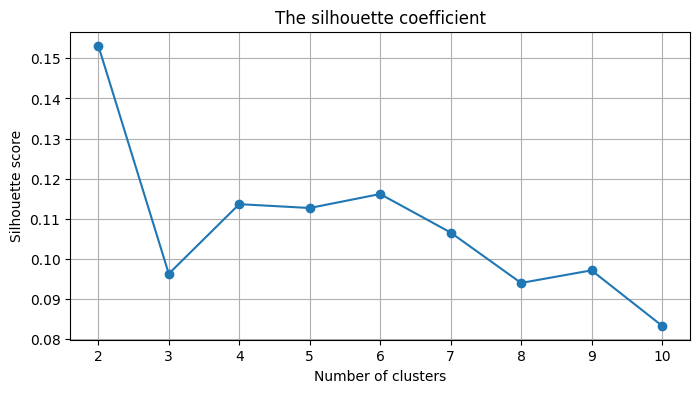

Optimal DBI: 5.681487825654676  
In k value : 5


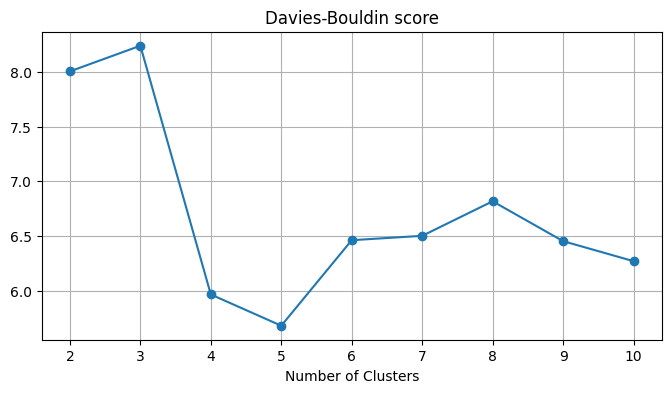

In [22]:
# Visualize the Silhouette Index
print('Optimal Silhouette index:', max(silhouette), ' \nIn k value\t\t:', 2+np.argmax(silhouette))
plt.figure(figsize=(8,4))
plt.title("The silhouette coefficient")
plt.plot([i for i in range(2,11)], silhouette, marker = 'o')
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.xticks([i for i in range(2,11)])
plt.yticks()
plt.show()

# Visualize the Davies-Bouldin Index
print('Optimal DBI:', min(db), ' \nIn k value :', 2+np.argmin(db))
plt.figure(figsize=(8,4))
plt.plot([i for i in range(2,11)], db, marker = 'o')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.title("Davies-Bouldin score")
plt.savefig('davies_bouldin_score.png')
plt.show()

### K-MODES CLUSTERING WITH K=5

In [23]:
n_clusters = 5
kmode5 = KModes(n_clusters, init = "cao", verbose=1)
    # Kelas Clustering
classes5 = kmode5.fit_predict(datafix)
labels5 = kmode5.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 832, cost: 35783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 832, cost: 35783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 832, cost: 35783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 832, cost: 35783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 832, cost: 35783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 832, cost: 35783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 832, cost: 35783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run

In [24]:
# Set the first cluster = 1
for i in range(0,len(classes5)):
    classes5[i]+=1

In [25]:
# Check the centroid
centroids5 = kmode5.cluster_centroids_
centroids5

array([[ 2,  3,  1,  4,  3, 10],
       [ 1,  4,  1,  5,  2, 10],
       [ 1,  2,  1,  2,  3, 11],
       [ 2,  2,  1,  5,  1, 21],
       [ 2,  4,  2,  2,  3,  1]], dtype=int64)

### ADD CLUSTER RESULT COLUMN

In [26]:
cluster5 = datafix.copy()
cluster5.insert(6, "Cluster", classes5, True)
cluster5

,Jenis Kelamin,Kategori Umur,Status Pulang Peserta,Segmen Peserta FKTP,Kelas Rawat,Segmen ICD 10,Cluster
0,2,1,1,3,3,18,1
1,2,1,1,3,3,12,1
2,1,3,1,5,2,18,2
3,1,3,1,5,2,12,2
4,1,3,1,5,2,7,2
...,...,...,...,...,...,...,...
16170,2,1,1,4,3,1,1
16171,2,4,1,3,3,1,5
16172,2,4,2,3,3,4,5
16173,1,1,2,3,3,1,5


### EXPORT K-MODES CLUSTERING RESULT

In [27]:
# Add the Kab/Kota column
dataselected = pd.read_excel('data_after_preprocessing_with_KabKot.xlsx')
cluster5.insert(7, 'Kab/Kota Tempat Tinggal Peserta', dataselected[['Kab/Kota Tempat Tinggal Peserta']])
cluster5

,Jenis Kelamin,Kategori Umur,Status Pulang Peserta,Segmen Peserta FKTP,Kelas Rawat,Segmen ICD 10,Cluster,Kab/Kota Tempat Tinggal Peserta
0,2,1,1,3,3,18,1,3508
1,2,1,1,3,3,12,1,3508
2,1,3,1,5,2,18,2,3529
3,1,3,1,5,2,12,2,3529
4,1,3,1,5,2,7,2,3529
...,...,...,...,...,...,...,...,...
16170,2,1,1,4,3,1,1,3510
16171,2,4,1,3,3,1,5,3578
16172,2,4,2,3,3,4,5,3578
16173,1,1,2,3,3,1,5,3526


In [28]:
# Export K-Modes clustering with k=5 result
# cluster5.to_excel('clustering_result_k=5.xlsx', index=False)